# TEST pycoQC package
** This notebook contains tests for all functions contained in pycoQC package **

## Imports

In [13]:
from pprint import pprint as pp

# Jupyter specific imports
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Pyplot/matplotlib imports and option
from matplotlib import pyplot as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = 20, 7
pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['font.sans-serif'] = ['DejaVu Sans']
pl.style.use('seaborn-white')

# Pandas imports and option
import pandas as pd
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 50

# Import pycoQC main class
from pycoQC import pycoQC

# Import functions from pycoQC_fun
from pycoQC_fun import jprint as print
from pycoQC_fun import jhelp as help
from pycoQC_fun import is_readable_file, sequencing_summary_file_sample

## Load example files

In [14]:
file_df = pycoQC.example_data_files()
display(file_df)

example_file_1D_DNA_1 = file_df.loc["1D_DNA_1.2.1"]["path"]
example_file_1D_RNA_2 = file_df.loc["1D_RNA_2.0.1"]["path"]
example_file_1D2_DNA_1 = file_df.loc["1D2_DNA_1.2.1"]["path"]

,path,description
1D_DNA_1.2.1,/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt,Sequencing summary file generated by a 1D_DNA run basecalled by Albacore 1.2.1
1D_RNA_2.0.1,/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt,Sequencing summary file generated by a 1D_RNA run basecalled by Albacore 2.0.1
1D2_DNA_1.2.1,/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D2_DNA_Albacore_1.2.1.txt,Sequencing summary file generated by a 1D2_DNA run basecalled by Albacore 1.2.1


# pycoQC_fun

### sequencing_summary_file_sample

In [45]:
help(sequencing_summary_file_sample, full=True)

Sample a number read lines in infile and write the output_over_time in output_file

If the file contains several runids the function will sample proportionally to the

* infile: STR

Path to a sequencing_summary input file

* outfile: STR (default None)

Path to a sequencing_summary output file. If not given, will return a dataframe instead

* n_seq: STR (default 10000)

Overall number of sequence lines to sample

In [14]:
df = sequencing_summary_file_sample("./data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt", n_seq=100)

50000 sequences
ad3de3b63de71c4c6d5ea4470a82782cf51210d9 = 49603 seq, to sample = 99
7082b6727942b3939a023beaf03ef24cec1722e5 = 397 seq, to sample = 1


# pycoQC

## pycoQC __init__

In [15]:
help(pycoQC.__init__, full=True)

Parse Albacore sequencing_summary.txt file and clean-up the data

* seq_summary_file: STR

Path to the sequencing_summary generated by Albacore 1.0.0 +

* run_type: STR (Default None)

Force to us the Type of the run 1D or 1D2

* runid_list: LIST of STR (Default [])

Select only specific runids to be analysed. Can also be used to force pycoQC to order the runids for

temporal plots, if the sequencing_summary file contain several sucessive runs. By default pycoQC analyses

all the runids in the file and uses the runid order as defined in the file.

* filter_zero_len

If True, zero length reads will be filtered out. [Default False]

* filter_fail

If True, sequenced flagged as fail will be filtered out of all (only compatible with albacore 2.0+)

### Base instantiation

In [25]:
p = pycoQC(example_file_1D_RNA_2, verbose=True)

In [27]:
p = pycoQC(example_file_1D2_DNA_1, verbose=True)

In [28]:
p = pycoQC(example_file_1D_DNA_1, verbose=True)

### Advanced Instantiation

In [30]:
runid_list = ["3a0ea63a73db0f9fb611b9da3a37045d249a9be0", "e7d9b3c6bb26250ffaf1f8be9d2d1ae0105204b9", "135e6b0c7d4223d4047216f10bede4ca5a84eb28"]
p = pycoQC(example_file_1D_RNA_2, runid_list=runid_list, verbose=True)

In [33]:
p = pycoQC(example_file_1D2_DNA_1, filter_zero_len=True ,verbose=True)

In [25]:
p = pycoQC(example_file_1D2_DNA_1, filter_fail=True ,verbose=True)

In [26]:
p = pycoQC(example_file_1D_RNA_2, filter_fail=True ,verbose=True)

## overview

In [16]:
help(pycoQC.overview, full=True)

Generate a quick overview of the data (tables + plots)

=> Return

A fig + 2 axes tuple for further user customisation (http://matplotlib.org/api/axes_api.html)

,Count
Reads,4.009600e+04
Bases,5.290519e+06
Events,7.078918e+07
Active Channels,5.050000e+02
Run Duration (h),3.155290e+01


,reads
2f4d52a34ec56518aa0d051dc4484c2b454abc6a,16845
f6d788dc15a52f5bbb736aa82c5dee7b9c50d63f,9527
aa23fdac499ddcbe80b86a240ee2e803f39d62ea,7113
135e6b0c7d4223d4047216f10bede4ca5a84eb28,4525
a175388e5c1ed0e6a78791f120de1c9efcb46b43,802
3a0ea63a73db0f9fb611b9da3a37045d249a9be0,515
e7d9b3c6bb26250ffaf1f8be9d2d1ae0105204b9,233
7e95428dd57055c0665696cce1bffc73fd5b5d29,207
b4013533403ec7bbe89d2e9e4021d06c69fe6cf5,175
5db3f3d44b7ce2c468a7d786060fe39e59282240,154


,Quality score distribution,Read length distribution
count,40096.000000,40096.000000
mean,5.477253,131.946304
std,1.315528,347.405268
min,1.000000,5.000000
10%,3.754000,50.000000
25%,4.602750,77.000000
50%,5.540000,111.000000
75%,6.380000,148.000000
90%,7.080000,191.000000
max,11.530000,25837.000000


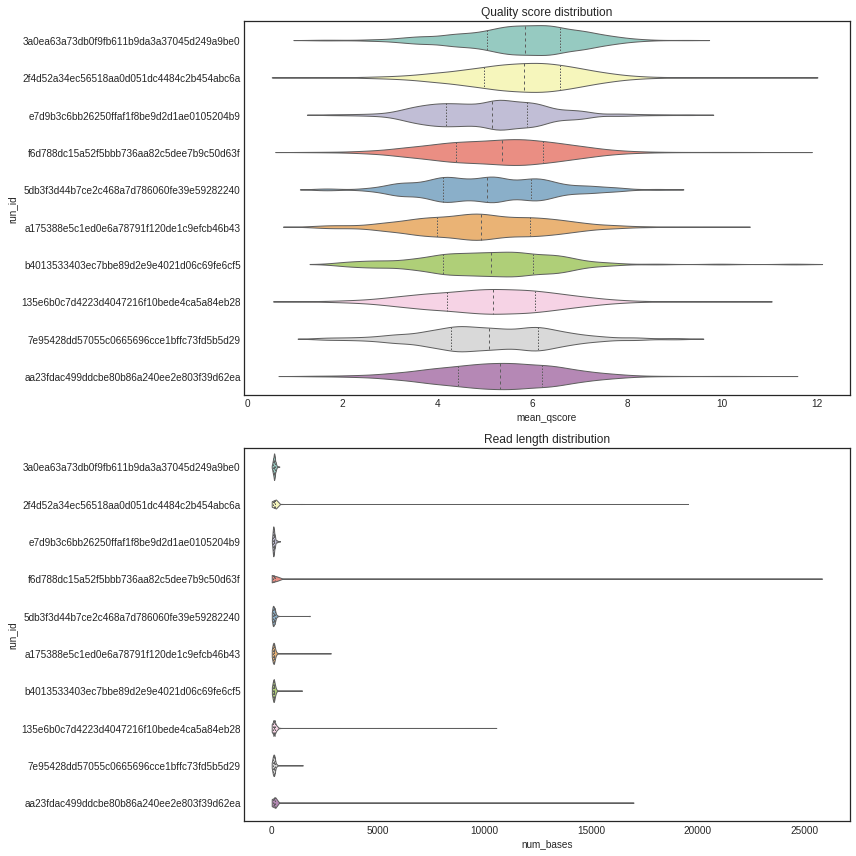

In [29]:
p = pycoQC(example_file_1D_RNA_2, filter_zero_len=True)
(fig1, ax1), (fig2, ax2) = p.overview()

,Count
Reads,9.975000e+03
Bases,2.087009e+07
Active Channels,2.100000e+01
Run Duration (h),2.079782e+01


,reads
5a13ea2bfbe679a8b1ede87e43dc1644159dfd39,9975


,Quality score distribution,Read length distribution
count,9975.000000,9975.000000
mean,13.249893,2092.239599
std,2.265103,3102.139740
min,3.951000,5.000000
10%,10.776200,356.000000
25%,11.780000,467.000000
50%,12.908000,731.000000
75%,14.792000,2107.000000
90%,16.407000,6589.000000
max,20.707000,109757.000000


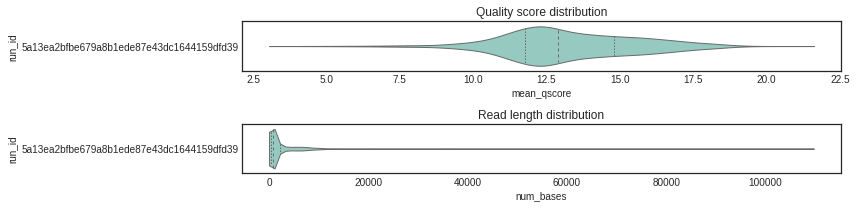

In [28]:
p = pycoQC(example_file_1D2_DNA_1, filter_zero_len=True)
fig, axes = p.overview()

## reads_len_bins

In [17]:
help(pycoQC.reads_len_bins, full=True)

Count the number of reads per interval of sequence length and return a dataframe

* bins

Limits of the intervals as a list

[Default [-1,0,25,50,100,500,1000,5000,10000,100000,10000000]]

In [29]:
p = pycoQC(example_file_1D_RNA_2, run_type="1D", filter_zero_len=True)
p.reads_len_bins()

,Count
Sequence lenght ranges,
"(-1, 0]",0
"(0, 25]",1054
"(25, 50]",3102
"(50, 100]",12708
"(100, 500]",22945
"(500, 1000]",69
"(1000, 5000]",194
"(5000, 10000]",12
"(10000, 100000]",12


In [27]:
p = pycoQC(example_file_1D2, run_type="1D2", filter_zero_len=True)
p.reads_len_bins(bins=[0,50,100,500,1000,10000,1000000])

,Count
Sequence lenght ranges,
"(0, 50]",157
"(50, 100]",75
"(100, 500]",2718
"(500, 1000]",2994
"(1000, 10000]",3743
"(10000, 1000000]",288


## reads_qual_bins

In [18]:
help(pycoQC.reads_qual_bins, full=True)

Count the number of reads per interval of sequence quality and return a dataframe

* bins

Limits of the intervals as a list

[Default [-1,0,2,4,6,8,10,12,14,16,18,20,40]]

In [29]:
p = pycoQC(example_file_1D2, run_type="1D2", filter_zero_len=True)
p.reads_qual_bins()

,Count
Sequence quality ranges,
"(-1, 0]",0
"(0, 2]",0
"(2, 4]",1
"(4, 6]",36
"(6, 8]",104
"(8, 10]",385
"(10, 12]",2420
"(12, 14]",3606
"(14, 16]",2100


In [30]:
p = pycoQC(example_file_1D, run_type="1D", filter_zero_len=True)
p.reads_qual_bins([0,2,4,6,8,10,12,14,16,40])

,Count
Sequence quality ranges,
"(0, 2]",0
"(2, 4]",42
"(4, 6]",888
"(6, 8]",13520
"(8, 10]",22032
"(10, 12]",39009
"(12, 14]",50354
"(14, 16]",1751
"(16, 40]",0


## channels_activity

In [19]:
help(pycoQC.channels_activity, full=True)

Plot the activity of channels at read, base or event level. The layout does not represent the physical layout of the flowcell

* level

Aggregate channel output results by "reads", "bases" or "events". The "events" level is not available for 2D, 1D2 run types [Default "reads"]

* figsize

Size of ploting area [Default [24,12]]

* cmap

Matplotlib colormap code to color the space [Default "OrRd"]

* alpha

Opacity of the area from 0 to 1 [Default 1]

* robust

if True the colormap range is computed with robust quantiles instead of the extreme values [Default True]

* annot

If True, write the data value in each cell. [Default True]

* fmt

String formatting code to use when adding annotations (see matplotlib documentation) [Default "d"]

* cbar

Whether to draw a colorbar scale on the right of the graph [Default False]

=> Return

A fig + axes tuple for further user customisation (http://matplotlib.org/api/axes_api.html)

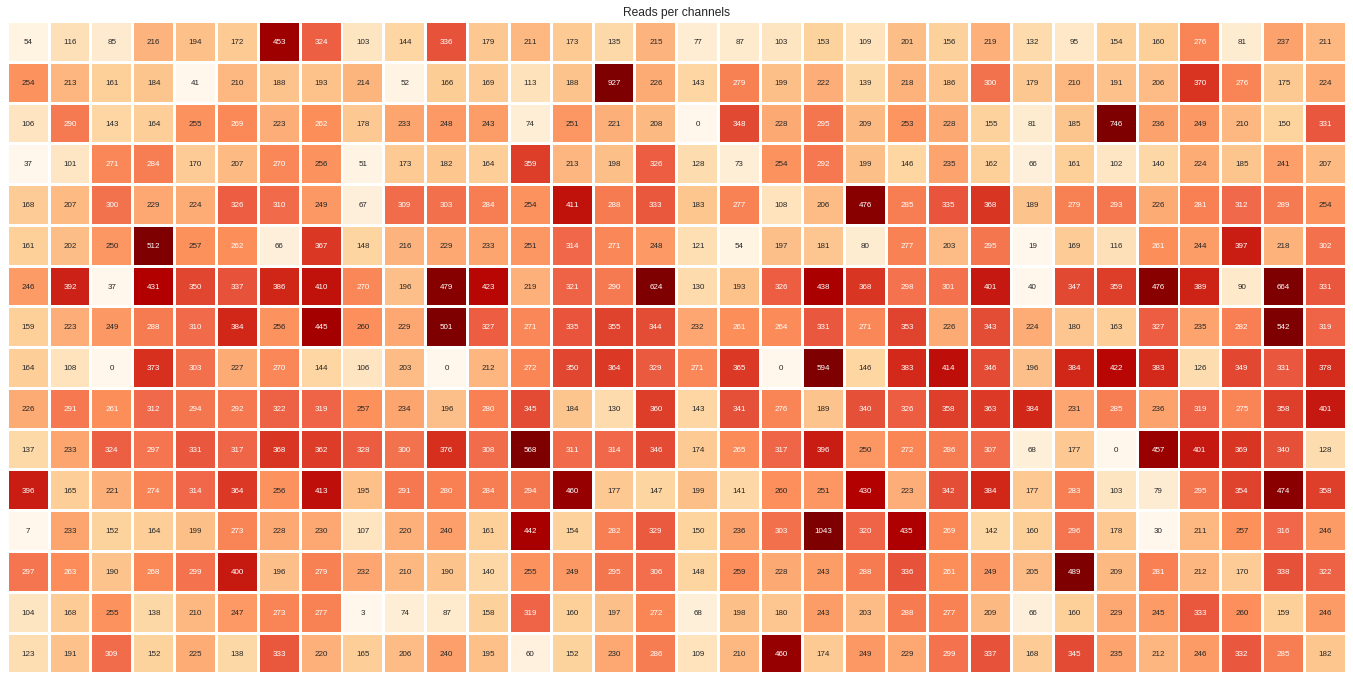

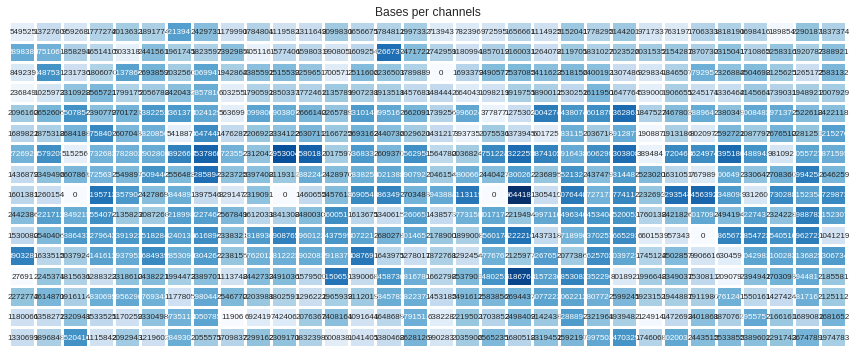

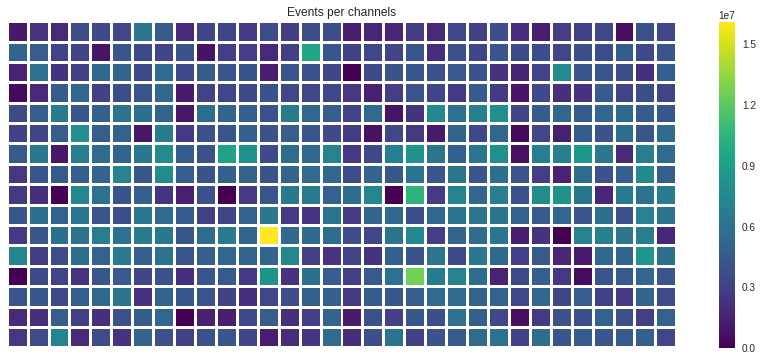

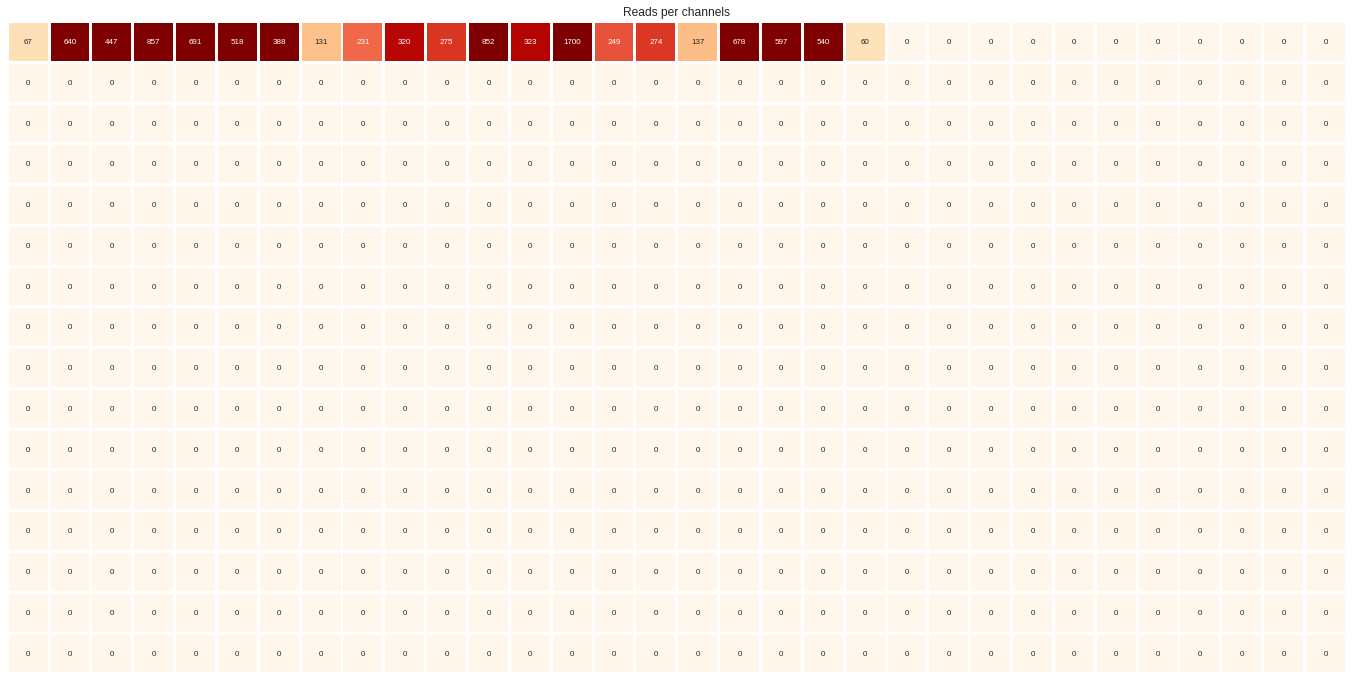

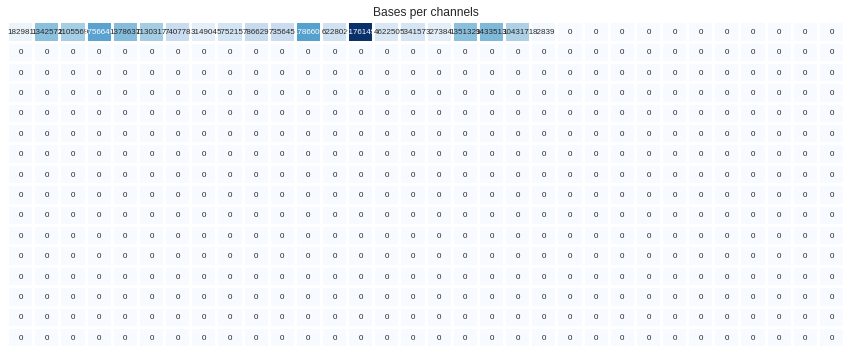

In [32]:
p = pycoQC(example_file_1D, run_type="1D", filter_zero_len=True)
g = p.channels_activity(level='reads')
g = p.channels_activity(level='bases', cmap="Blues", robust=False, figsize=[15,6])
g = p.channels_activity(level='events', cmap="viridis", cbar=True, annot=False, figsize=[15,6], robust=False)

p = pycoQC(example_file_1D2, run_type="1D2", filter_zero_len=True)
g = p.channels_activity(level='reads')
g = p.channels_activity(level='bases', cmap="Blues", robust=False, figsize=[15,6])
g = p.channels_activity(level='events', cmap="viridis", cbar=True, annot=False, figsize=[15,6], robust=False)

## mean_qual_distribution

In [20]:
help(pycoQC.reads_qual_distribution, full=True)

Plot the distribution of mean read quality

* figsize

Size of ploting area [Default [30,7]]

* hist

If True plot an histogram of distribution [Default True]

* kde

If True plot a univariate kernel density estimate [Default True]

* kde_color / hist_color

Color map or color codes to use for the 3 plots [Default "black" "orangered"]

* kde_alpha / hist_alpha

Opacity of the area from 0 to 1 for the 3 plots [Default 0.5 0.5]

* win_size

Size of the bins in quality score ranging from 0 to 40 for the histogram [Default 0.1]

* sample

If given, a n number of reads will be randomly selected instead of the entire dataframe [Default 100000]

* xmin, xmax, ymin, ymax

Lower and upper limits on x/y axis [Default None]

* min_qual, max_qual

Minimal and maximal read quality cut-offs for the plot [Default None]

* min_freq, max_freq

Minimal and maximal read frequency cut-offs for the plot [Default None]

=> Return

A fig + axes tuple for further user customisation (http://matplotlib.org/api/axes_api.html)

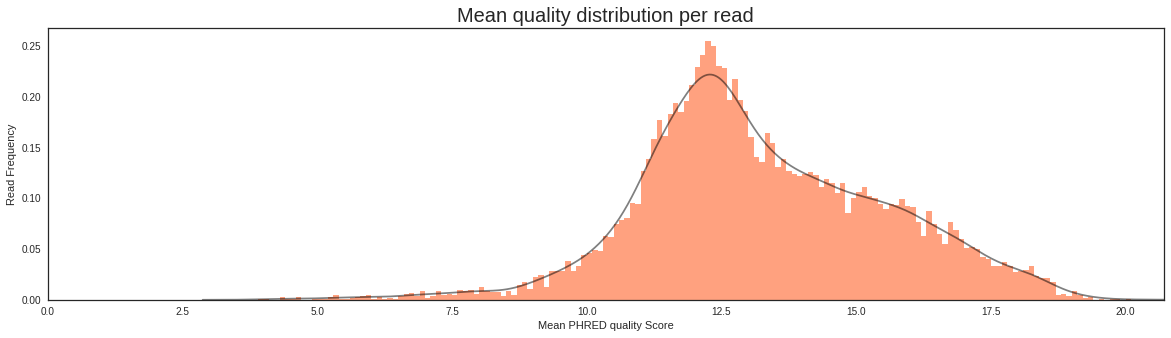

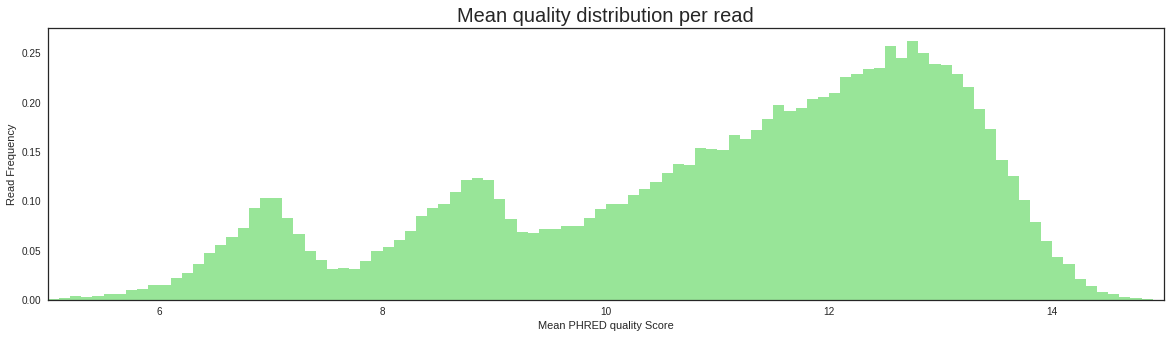

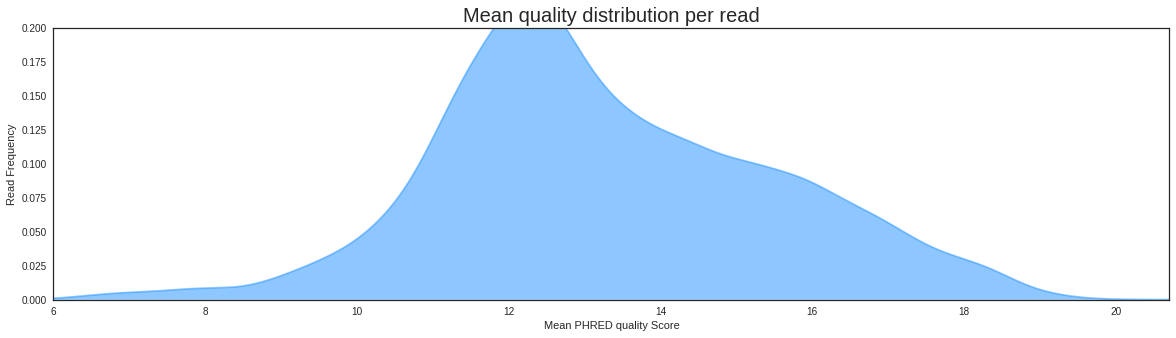

In [34]:
# Default option = histogram + kde
p = pycoQC(example_file_1D2, filter_zero_len=True, run_type="1D2")
g = p.reads_qual_distribution(figsize=[20, 5])
g.title.set_fontsize(20)

# histogram only
p = pycoQC(example_file_1D, filter_zero_len=True, run_type="1D")
g = p.reads_qual_distribution(figsize=[20, 5], kde=False, hist_color="limegreen", max_qual=15, min_qual=5)
g.title.set_fontsize(20)

# kde only
p = pycoQC(example_file_1D2, filter_zero_len=True, run_type="1D2")
g = p.reads_qual_distribution(figsize=[20, 5], hist=False, kde_color="dodgerblue", min_qual=6, max_freq=0.2)
g.title.set_fontsize(20)

## output_over_time

In [21]:
help(pycoQC.output_over_time, full=True)

Plot the output over the time of the experiment at read, base or event level

* level

Aggregate channel output results by "reads", "bases" or "events" [Default "reads"]

* figsize

Size of ploting area [Default [30,7]

* color

Color of the plot. Valid matplotlib color code [Default "orangered"]

* alpha

Opacity of the area from 0 to 1 [Default 0.5]

* win_size

Size of the bins in hours [Default 0.25]

=> Return

A fig + axes tuple for further user customisation (http://matplotlib.org/api/axes_api.html)

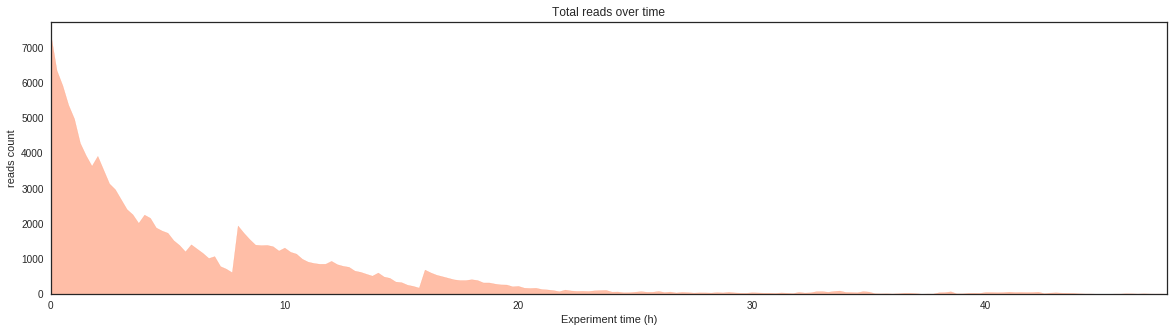

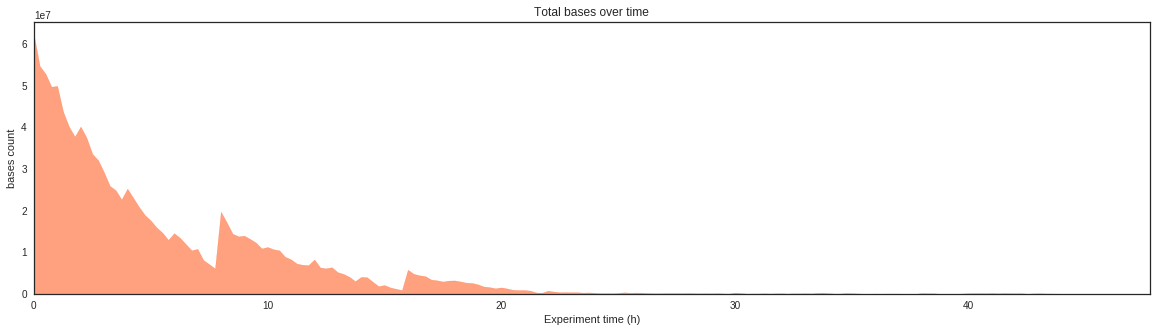

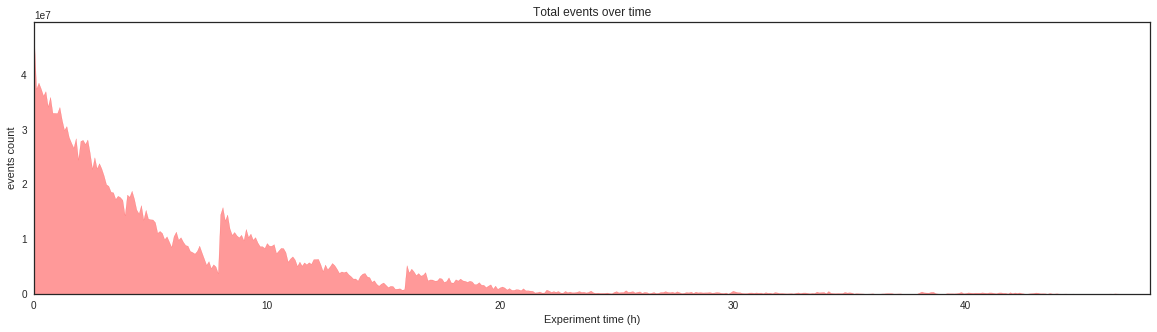

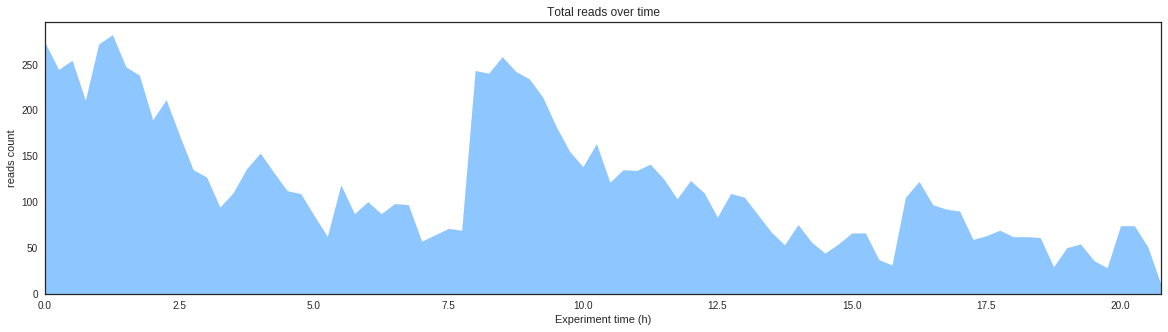

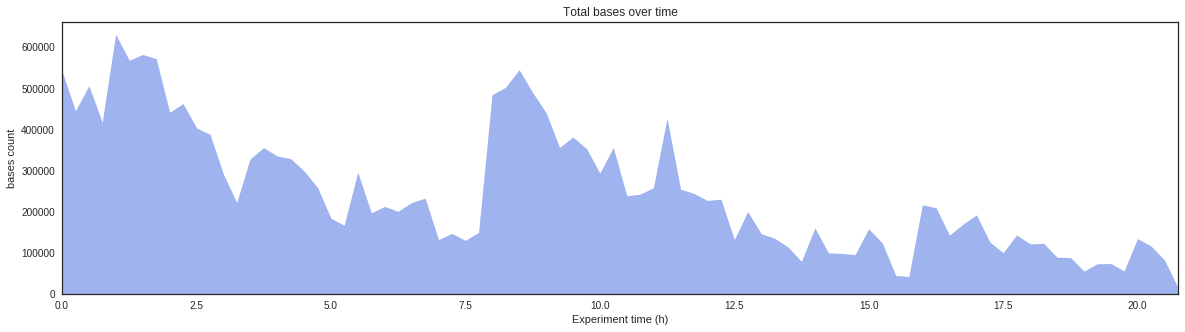

In [36]:
p = pycoQC(example_file_1D, run_type="1D", filter_zero_len=True)
g = p.output_over_time(level='reads', figsize=[20, 5], color='coral')
g = p.output_over_time(level='bases', figsize=[20, 5], color='orangered')
g = p.output_over_time(level='events', figsize=[20, 5], color='red', alpha=0.4, win_size=0.1)

p = pycoQC(example_file_1D2, run_type="1D2", filter_zero_len=True)
g = p.output_over_time(level='reads', figsize=[20, 5], color='dodgerblue')
g = p.output_over_time(level='bases', figsize=[20, 5], color='royalblue')
g = p.output_over_time(level='events', figsize=[20, 5], color='blue', alpha=0.4, win_size=0.1) ### Xfail

## quality_over_time

In [22]:
help(pycoQC.quality_over_time, full=True)

Plot the evolution of the mean read quality over the time of the experiment at read, base or event level

* figsize

Size of ploting area [Default [30,7]

* color

Color of the plot. Valid matplotlib color code [Default "orangered"]

* alpha

Opacity of the area from 0 to 1 [Default 0.25]

* win_size

Size of the bins in hours [Default 0.25]

=> Return

A matplotlib fig + axes tuple for further user customisation (http://matplotlib.org/api/axes_api.html)

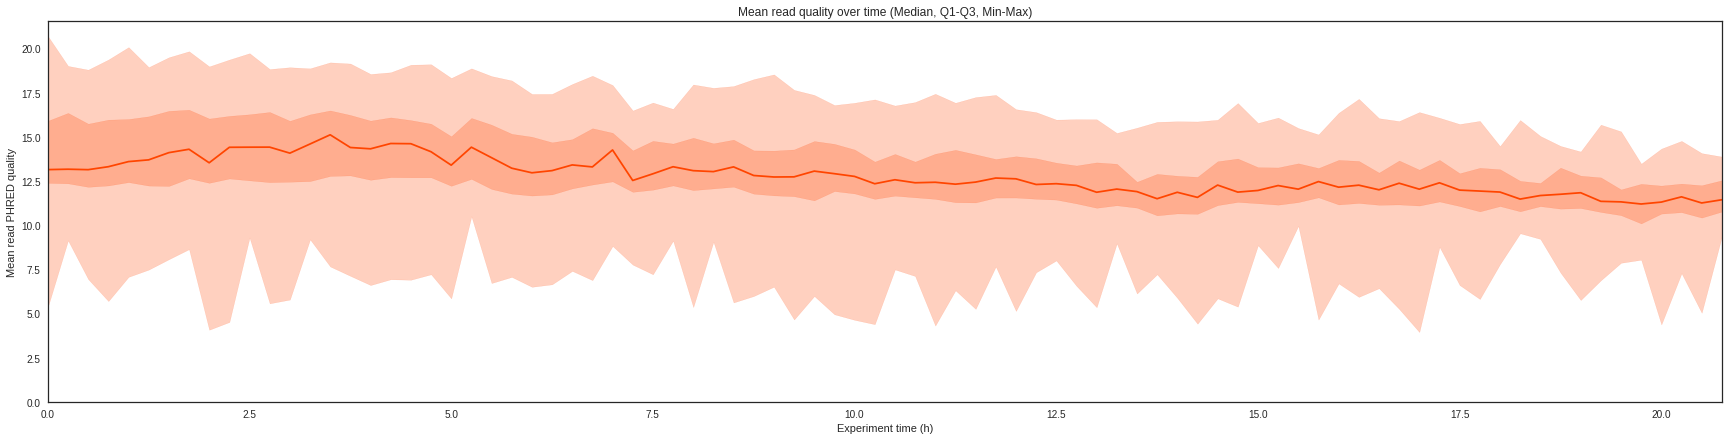

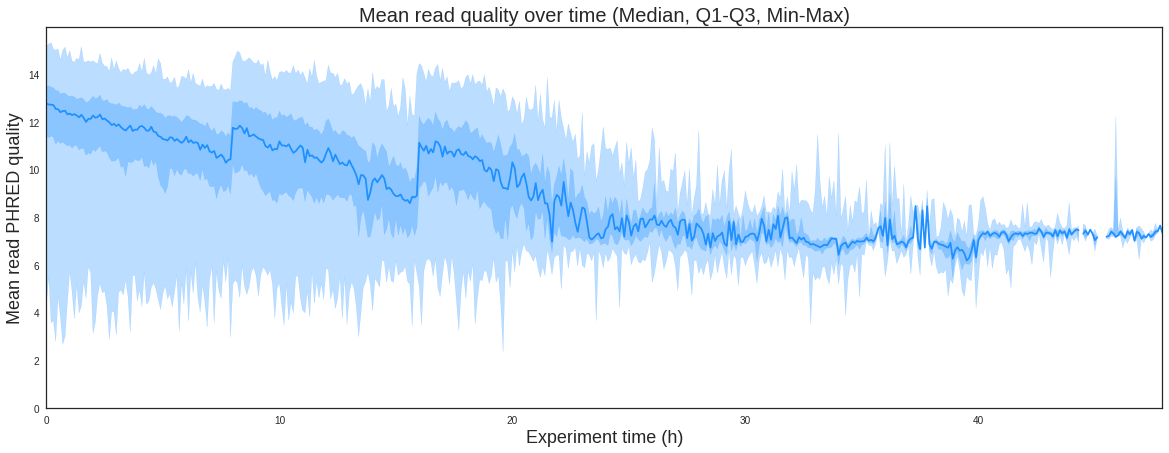

In [38]:
p = pycoQC(example_file_1D2, run_type="1D2", filter_zero_len=True)
g = p.quality_over_time()

p = pycoQC(example_file_1D, run_type="1D", filter_zero_len=True)
g = p.quality_over_time(figsize=[20,7], color='dodgerblue', alpha=0.3, win_size=0.1)

# Changing size of the axis title and labels
g.title.set_fontsize(20)
g.xaxis.label.set_fontsize(18)
g.yaxis.label.set_fontsize(18)

## reads_len_distribution

In [23]:
help(pycoQC.reads_len_distribution, full=True)

Plot the distribution of read length in base pairs

* figsize

Size of ploting area [Default [30,7]]

* hist

If True plot an histogram of distribution [Default True]

* kde

If True plot a univariate kernel density estimate [Default True]

* kde_color / hist_color

Color map or color codes to use for the 3 plots [Default "black" "orangered"]

* kde_alpha / hist_alpha

Opacity of the area from 0 to 1 for the 3 plots [Default 0.5 0.5]

* win_size

Size of the bins in base pairs for the histogram [Default 250]

* sample

If given, a n number of reads will be randomly selected instead of the entire dataframe [Default 100000]

* min_len, max_len

Minimal and maximal read length cut-offs for the plot [Default None]

* min_freq, max_freq

Minimal and maximal read frequency cut-offs for the plot [Default None]

=> Return

A fig + axes tuple for further user customisation (http://matplotlib.org/api/axes_api.html)

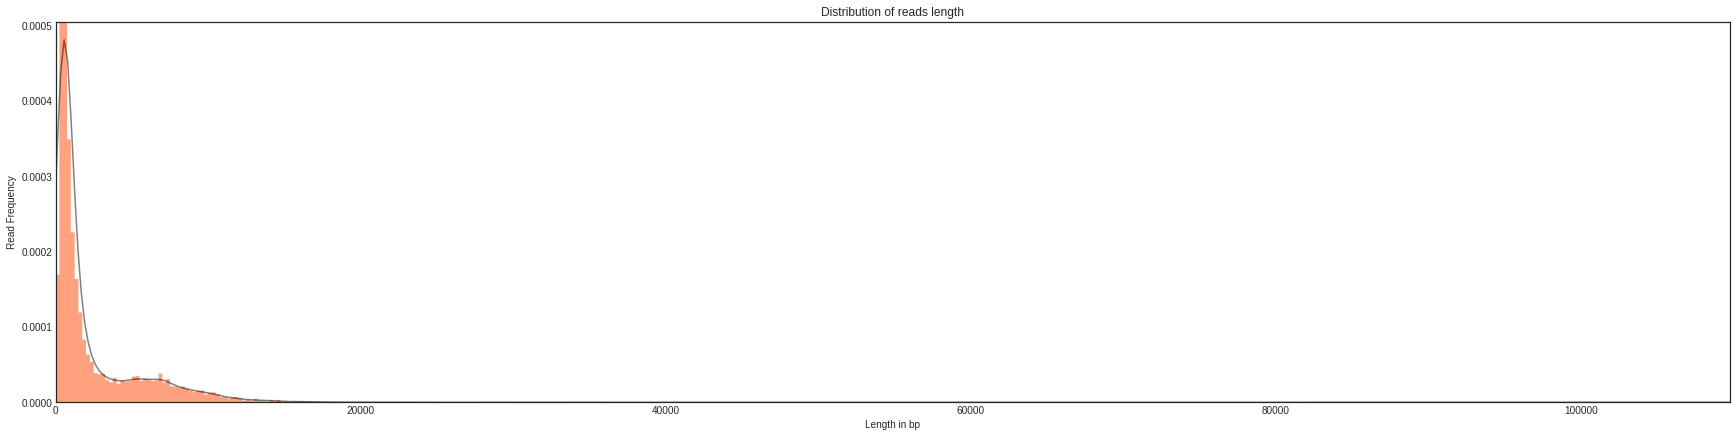

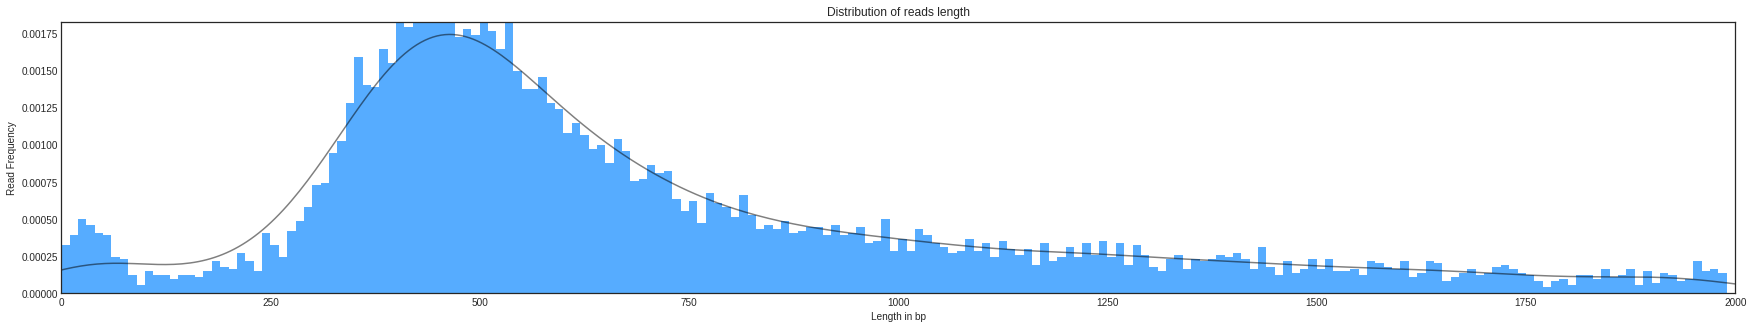

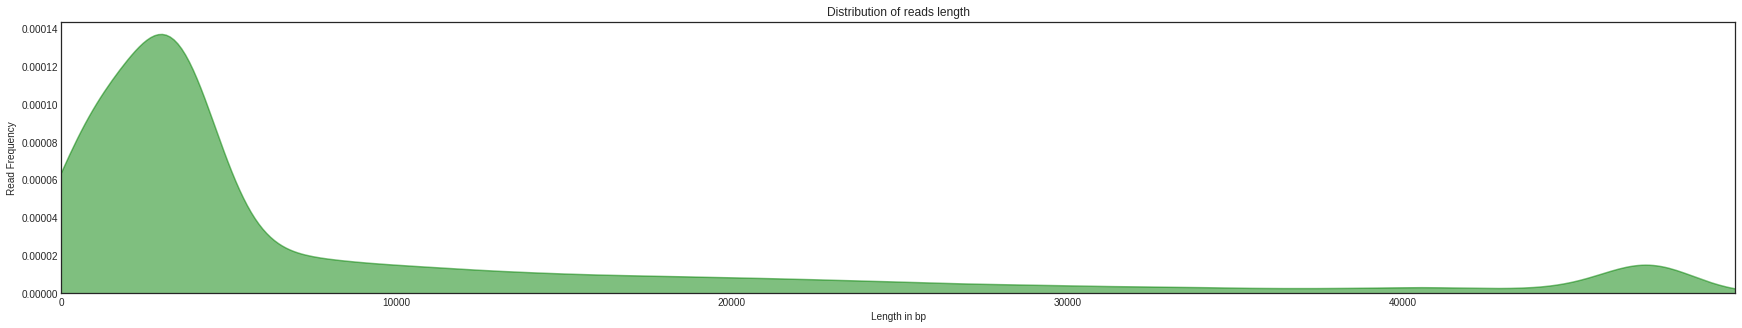

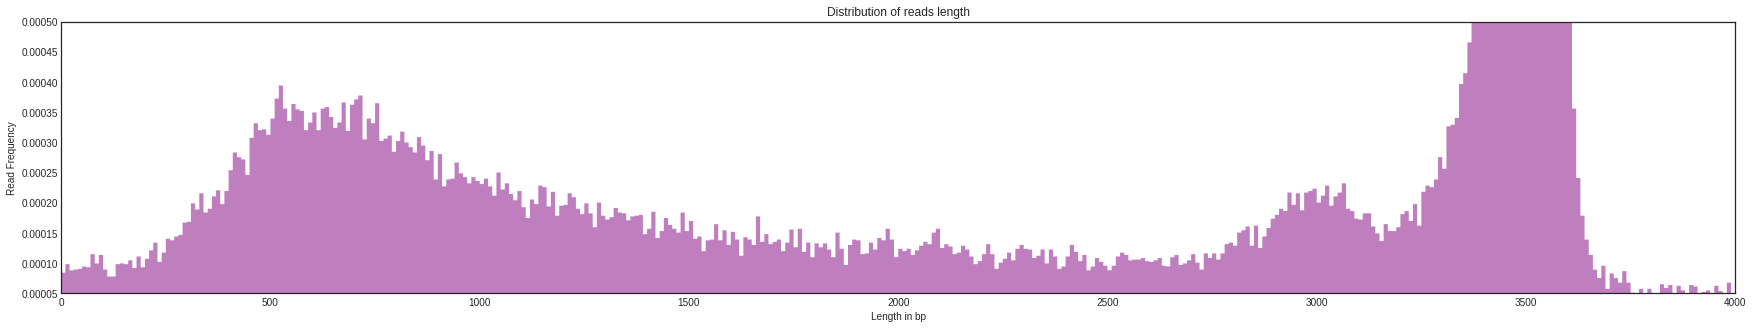

In [17]:
p = pycoQC(example_file_1D2, filter_zero_len=True, run_type="1D2")
g = p.reads_len_distribution()
g = p.reads_len_distribution(figsize=[30, 5], hist=True, kde=True, hist_color='dodgerblue', hist_alpha=0.75, max_len=2000, win_size=10)

p = pycoQC(example_file_1D, filter_zero_len=True, run_type="1D")
g = p.reads_len_distribution(figsize=[30, 5], hist=False, kde=True, kde_color='green', kde_alpha=0.5)
g = p.reads_len_distribution(figsize=[30, 5], hist=True, kde=False, hist_color='purple', win_size=10, min_freq=0.00005, max_freq=0.0005, max_len=4000)

## reads_len_quality

In [24]:
help(pycoQC.reads_len_quality, full=True)

Draw a bivariate plot of read length vs mean read quality with marginal univariate plots.

* figsize

Size of square ploting area [Default 12]

* kde

If True plot a bivariate kernel density estimate [Default True]

* scatter

If True plot a scatter plot  [Default true]

* margin_plot

If True plot marginal univariate distributions [Default True]

* kde_cmap / scatter_color / margin_plot_color

Color map or color codes to use for the 3 plots [Default "copper", "orangered", "orangered"]

* kde_alpha / scatter_alpha / margin_plot_alpha

Opacity of the area from 0 to 1 for the 3 plots [Default 1, 0.01, 0.5]

* sample

If given, a n number of reads will be randomly selected instead of the entire dataframe [Default 100000]

* kde_levels

Number of levels for the central density plot [Default 10]

* kde_shade

If True the density curves will be filled [Default False]

* min_len, max_len

Minimal and maximal read length cut-offs for the plot [Default None]

* min_qual, max_qual

Minimal and maximal read quality cut-offs for the plot [Default None]

=> Return

A seaborn JointGrid object containing the plot. (http://seaborn.pydata.org/generated/seaborn.JointGrid.html)

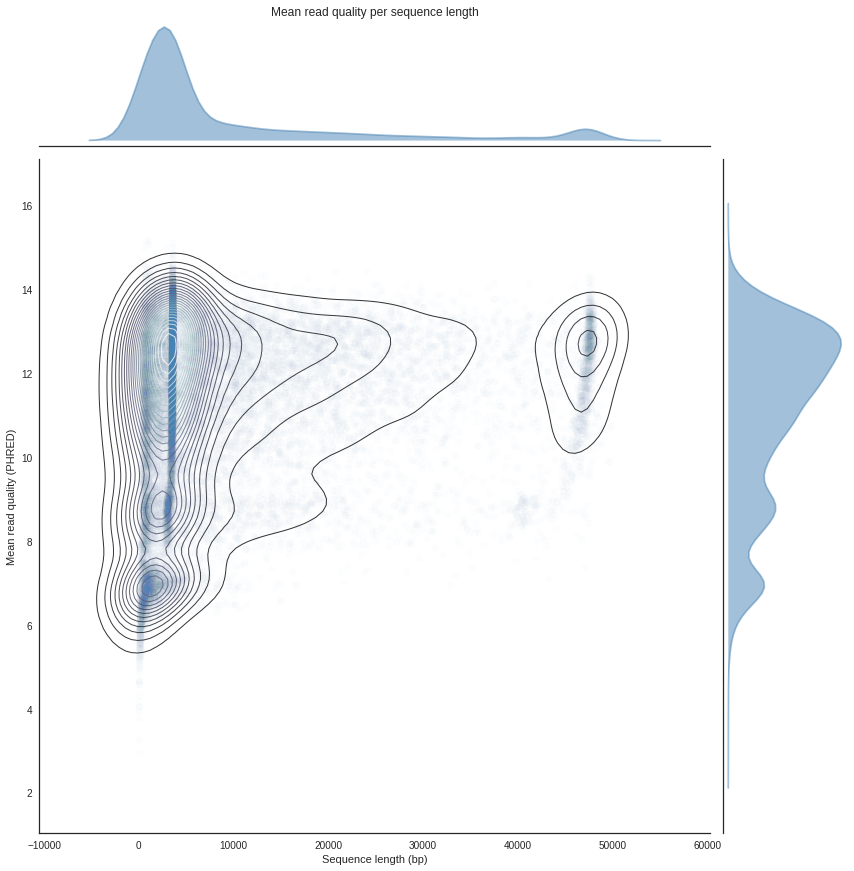

In [42]:
p = pycoQC(example_file_1D, filter_zero_len=True, run_type="1D")
p.reads_len_quality(kde=True, kde_cmap="bone", kde_alpha=0.8, kde_levels=25, scatter=True, scatter_color='steelblue', margin_plot=True, margin_plot_color='steelblue', sample = 20000)

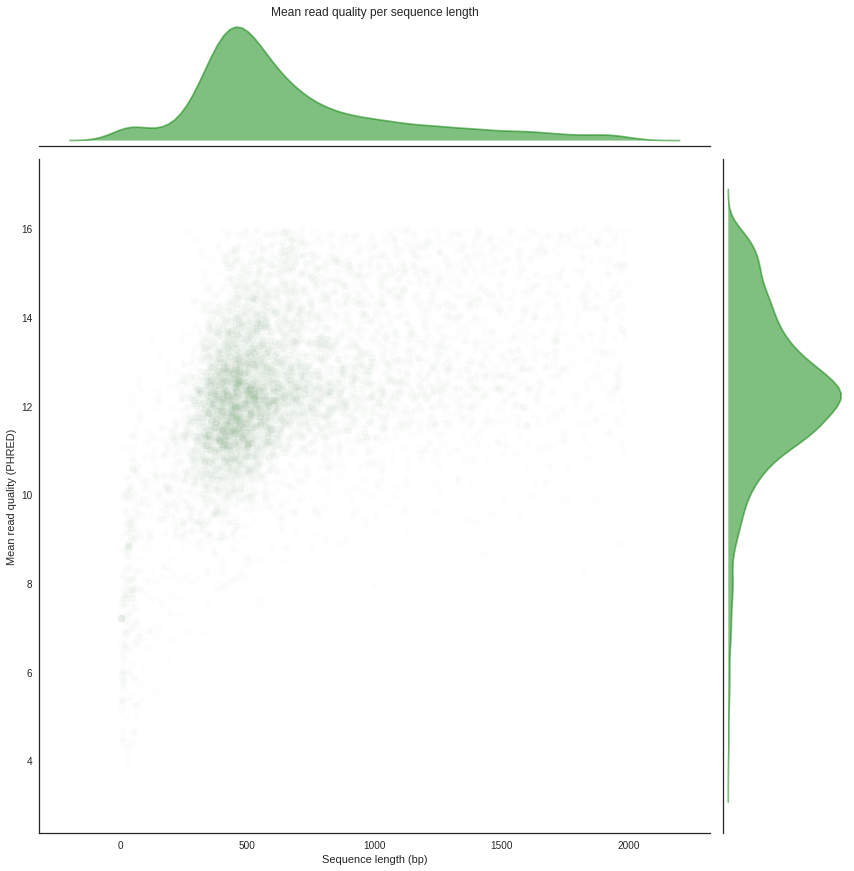

In [43]:
p = pycoQC(example_file_1D2, filter_zero_len=True, run_type="1D2")
p.reads_len_quality(scatter=True, kde=False, scatter_alpha=0.01, scatter_color="green", margin_plot=True, margin_plot_color='green', margin_plot_alpha=0.5, min_len=0, max_len=2000, min_qual=2, max_qual=16)

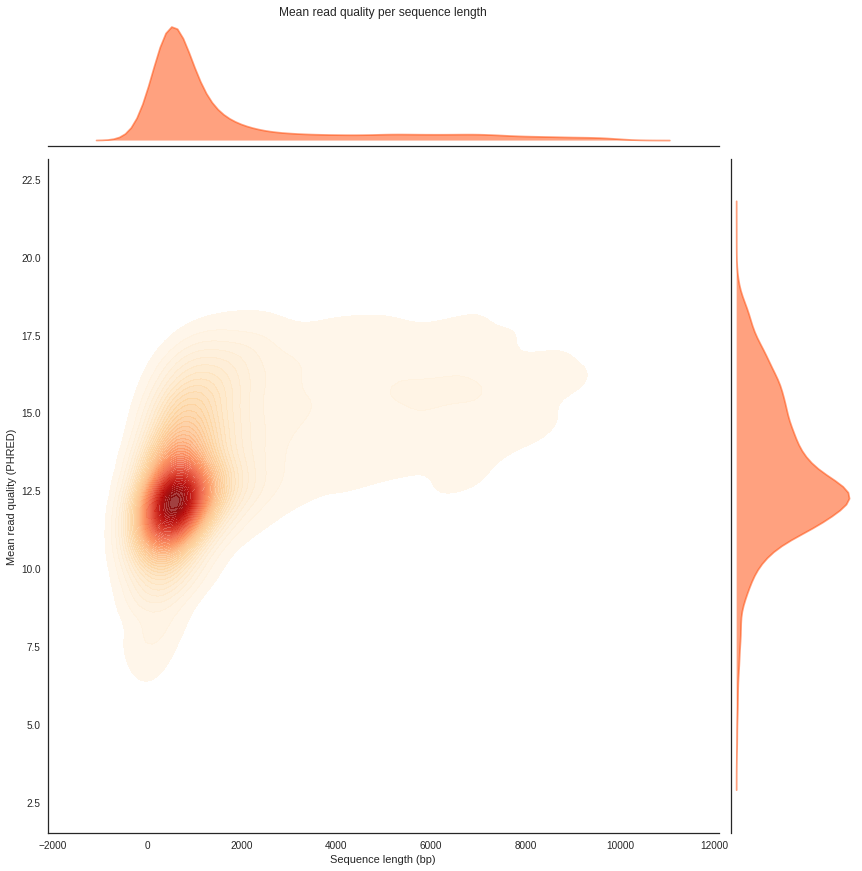

In [44]:
p = pycoQC(example_file_1D2, filter_zero_len=True, run_type="1D2")
g = p.reads_len_quality(kde=True, kde_cmap='OrRd', kde_alpha=0.75, kde_levels=50, kde_shade=True, scatter=False, sample = 50000, max_len=10000)

# Dev 

In [35]:
import pandas as pd
from pycl.pycl import head, tail, cat

In [34]:
head ("./data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt")

In [17]:
df = pd.read_csv("./data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt", sep ="\t")
pp (df.columns)
display(df.head())

Index(['filename', 'read_id', 'run_id', 'channel', 'start_time', 'duration',
       'num_events', 'passes_filtering', 'template_start',
       'num_events_template', 'template_duration', 'num_called_template',
       'sequence_length_template', 'mean_qscore_template',
       'strand_score_template', 'calibration_strand_genome_template',
       'calibration_strand_identity_template',
       'calibration_strand_accuracy_template', 'aligned_speed_bps_template'],
      dtype='object')


,filename,read_id,run_id,channel,start_time,duration,num_events,passes_filtering,template_start,num_events_template,template_duration,num_called_template,sequence_length_template,mean_qscore_template,strand_score_template,calibration_strand_genome_template,calibration_strand_identity_template,calibration_strand_accuracy_template,aligned_speed_bps_template
0,dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_mux_scan_modRNA_r001_68137_read_254_ch_451_strand.fast5,e6c18a6b-c15e-4f98-9736-a1a1f4d5f1d8,3a0ea63a73db0f9fb611b9da3a37045d249a9be0,451,277.12375,3.81550,1017,False,0.0000,1017,3.81550,1017,35,5.014,-0.0034,filtered_out,-1.0,-1.0,0.0
1,dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_mux_scan_modRNA_r001_68137_read_37_ch_171_strand.fast5,9c224408-e940-4bb2-9d0b-7cc9fe8d8a3c,3a0ea63a73db0f9fb611b9da3a37045d249a9be0,171,59.09725,4.87125,1299,False,0.0000,1299,4.87125,1299,146,5.845,-0.0026,filtered_out,-1.0,-1.0,0.0
2,dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_mux_scan_modRNA_r001_68137_read_139_ch_122_strand.fast5,3bcd008e-40d0-45a9-b9fc-69200a45248a,3a0ea63a73db0f9fb611b9da3a37045d249a9be0,122,208.28675,6.53700,1743,False,0.0000,1743,6.53700,1743,117,6.047,-0.0019,filtered_out,-1.0,-1.0,0.0
3,dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_mux_scan_modRNA_r001_68137_read_169_ch_411_strand.fast5,f62e00be-bf3c-49a2-9cf0-f9d22b5f89a6,3a0ea63a73db0f9fb611b9da3a37045d249a9be0,411,186.14375,3.52700,0,False,0.0000,0,0.00000,0,0,0.000,0.0000,no_match,-1.0,-1.0,0.0
4,dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_mux_scan_modRNA_r001_68137_read_131_ch_487_strand.fast5,af0cdd89-85b2-447d-b3b2-0bbd12a30f79,3a0ea63a73db0f9fb611b9da3a37045d249a9be0,487,157.32875,5.27700,1282,False,0.4695,1282,4.80750,1282,114,5.410,-0.0031,filtered_out,-1.0,-1.0,0.0


In [25]:
df["calibration_strand_genome_template"].value_counts()

filtered_out    39962
no_match         9910
YHR174W           128
Name: calibration_strand_genome_template, dtype: int64

In [28]:
df[(df["calibration_strand_genome_template"] == "YHR174W")]

,filename,read_id,run_id,channel,start_time,duration,num_events,passes_filtering,template_start,num_events_template,template_duration,num_called_template,sequence_length_template,mean_qscore_template,strand_score_template,calibration_strand_genome_template,calibration_strand_identity_template,calibration_strand_accuracy_template,aligned_speed_bps_template
1066,dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_2025_ch_91_strand.fast5,47fe1e56-4b92-42c3-9419-5fe3d0c7fdbd,2f4d52a34ec56518aa0d051dc4484c2b454abc6a,91,2947.39825,19.09300,5091,True,0.00000,5091,19.09300,5091,1412,10.869,-0.0015,YHR174W,0.986614,0.937173,75.161949
1128,dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_3628_ch_80_strand.fast5,8a8c903d-0c92-4a04-a60a-07f36628e892,2f4d52a34ec56518aa0d051dc4484c2b454abc6a,80,6050.31850,22.49350,5998,True,0.00000,5998,22.49350,5998,1442,10.308,-0.0017,YHR174W,0.970866,0.906618,64.013252
1535,dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_3297_ch_485_strand.fast5,b428a03d-002b-47d1-911c-bc47008b93a5,2f4d52a34ec56518aa0d051dc4484c2b454abc6a,485,4786.68625,16.73550,4462,True,0.00000,4462,16.73550,4462,1425,10.988,-0.0015,YHR174W,0.976077,0.918919,83.469185
1713,dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_7639_ch_440_strand.fast5,5b44b5b1-89a5-4b1f-aff1-2a720ea9f986,2f4d52a34ec56518aa0d051dc4484c2b454abc6a,440,10611.96350,25.20100,6720,True,0.00000,6720,25.20100,6720,1400,9.449,-0.0017,YHR174W,0.970016,0.889302,57.661926
1822,dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_2868_ch_394_strand.fast5,6906a078-939e-4d5a-8aaf-8c6e146712f8,2f4d52a34ec56518aa0d051dc4484c2b454abc6a,394,3745.13400,24.33075,6488,True,0.00000,6488,24.33075,6488,1463,9.629,-0.0016,YHR174W,0.967007,0.905813,58.687431
1861,dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_2543_ch_360_strand.fast5,f913e917-c757-4356-8bc1-6cb5d3172137,2f4d52a34ec56518aa0d051dc4484c2b454abc6a,360,4131.77800,18.33750,4890,True,0.00000,4890,18.33750,4890,1440,9.400,-0.0019,YHR174W,0.958003,0.897550,79.557678
1915,dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_6652_ch_430_strand.fast5,e5dba4cc-04b4-4745-82c4-ceee35307152,2f4d52a34ec56518aa0d051dc4484c2b454abc6a,430,12227.41125,25.34575,6758,True,0.00000,6758,25.34575,6758,1459,9.430,-0.0016,YHR174W,0.979528,0.900797,56.325924
2167,dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_4928_ch_445_strand.fast5,62cf0f62-c245-4b38-a537-1c1477f60c8a,2f4d52a34ec56518aa0d051dc4484c2b454abc6a,445,7124.73550,18.55225,4947,True,0.00000,4947,18.55225,4947,1462,10.802,-0.0015,YHR174W,0.980545,0.934025,77.739143
2253,dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_2342_ch_197_strand.fast5,20d94854-1d3d-4588-87e6-dd96dfa23138,2f4d52a34ec56518aa0d051dc4484c2b454abc6a,197,3618.19250,22.99500,6132,True,0.00000,6132,22.99500,6132,1404,10.086,-0.0017,YHR174W,0.977778,0.913947,62.000874
2367,dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_1964_ch_157_strand.fast5,ce585ee1-9c26-4741-84fe-569c0f7ed791,2f4d52a34ec56518aa0d051dc4484c2b454abc6a,157,2642.05725,17.43500,4649,True,0.00000,4649,17.43500,4649,1479,10.696,-0.0016,YHR174W,0.980159,0.907421,85.160202


In [18]:
df = pd.read_csv("./data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt", sep ="\t")
pp (df.columns)
display(df.head())

Index(['filename', 'read_id', 'run_id', 'channel', 'start_time', 'duration',
       'num_events', 'template_start', 'num_events_template',
       'template_duration', 'num_called_template', 'sequence_length_template',
       'mean_qscore_template', 'strand_score_template'],
      dtype='object')


,filename,read_id,run_id,channel,start_time,duration,num_events,template_start,num_events_template,template_duration,num_called_template,sequence_length_template,mean_qscore_template,strand_score_template
0,Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173_sequencing_run_LambdaPhage2_56835_ch25_read25655_strand.fast5,78ff81ca-a98a-42dd-a4d0-da3cdce4a58a,ad3de3b63de71c4c6d5ea4470a82782cf51210d9,25,43688.41225,32.28575,26147,0.01525,26147,32.27050,26147,13680,8.287,-0.0012
1,Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173_sequencing_run_LambdaPhage2_56835_ch464_read94_strand.fast5,e3e4c1b5-2c8b-45b8-9343-4556d168d3e4,ad3de3b63de71c4c6d5ea4470a82782cf51210d9,464,366.69175,10.66100,8551,0.00000,8551,10.66100,8551,5244,11.404,-0.0010
2,Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173_sequencing_run_LambdaPhage2_56835_ch58_read1933_strand.fast5,88ce546b-5a65-415f-a804-beac498bd345,ad3de3b63de71c4c6d5ea4470a82782cf51210d9,58,12908.85125,1.86050,1321,0.20650,1321,1.65400,1321,840,12.401,-0.0008
3,Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173_sequencing_run_LambdaPhage2_56835_ch4_read3422_strand.fast5,a201e03f-5e22-4bae-8a3e-c2aa4878a7b0,ad3de3b63de71c4c6d5ea4470a82782cf51210d9,4,36200.59750,4.74650,3703,0.07050,3703,4.67600,3703,705,6.920,-0.0019
4,Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173_sequencing_run_LambdaPhage2_56835_ch422_read12703_strand.fast5,1c27e49c-ad0f-4582-9969-fdffa86b2562,ad3de3b63de71c4c6d5ea4470a82782cf51210d9,422,46239.24625,90.23425,72582,0.63950,72582,89.59475,72582,39852,8.558,-0.0013


In [2]:
df = pd.read_csv("./data/sequencing_summary_1D2_DNA_Albacore_1.2.1.txt", sep ="\t")
pp (df.columns)
display(df.head())

Index(['filename1', 'filename2', 'read_id1', 'read_id2', 'read_id', 'run_id',
       'channel', 'start_time', 'sequence_length_2d', 'mean_qscore_2d'],
      dtype='object')


,filename1,filename2,read_id1,read_id2,read_id,run_id,channel,start_time,sequence_length_2d,mean_qscore_2d
0,Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_27_ch_1_strand.fast5,Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_29_ch_1_strand.fast5,e30e3338-c234-49d1-a5e5-e33edf92ac78,479b3fb3-463a-49e0-a4f0-553fcfc89367,e30e3338-c234-49d1-a5e5-e33edf92ac78479b3fb3-463a-49e0-a4f0-553fcfc89367,5a13ea2bfbe679a8b1ede87e43dc1644159dfd39,1,26.42497,865,16.685
1,Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_496_ch_1_strand.fast5,Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_498_ch_1_strand.fast5,1b6bac9c-43ea-4a03-bf30-6d2388d92c53,f7d734b9-4651-4243-b25f-480cad4e9ee9,1b6bac9c-43ea-4a03-bf30-6d2388d92c53f7d734b9-4651-4243-b25f-480cad4e9ee9,5a13ea2bfbe679a8b1ede87e43dc1644159dfd39,1,1006.83051,341,12.247
2,Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_47_ch_1_strand.fast5,Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_49_ch_1_strand.fast5,2c996caf-1883-4293-a82a-41fddeca9aac,9de9f7d8-e4a6-4367-9aa5-eaa749d3c104,2c996caf-1883-4293-a82a-41fddeca9aac9de9f7d8-e4a6-4367-9aa5-eaa749d3c104,5a13ea2bfbe679a8b1ede87e43dc1644159dfd39,1,50.37915,559,12.664
3,Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_73_ch_1_strand.fast5,Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_75_ch_1_strand.fast5,08944a86-a32a-48f4-bcaa-b96777a7224a,485e9580-c1fa-4225-9907-1106cb261c86,08944a86-a32a-48f4-bcaa-b96777a7224a485e9580-c1fa-4225-9907-1106cb261c86,5a13ea2bfbe679a8b1ede87e43dc1644159dfd39,1,77.39226,593,12.817
4,Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_526_ch_1_strand.fast5,Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_530_ch_1_strand.fast5,83349be4-2b55-48fa-bac5-223c895d17c4,fef07c9b-027f-4108-a2e0-07752551b4cc,83349be4-2b55-48fa-bac5-223c895d17c4fef07c9b-027f-4108-a2e0-07752551b4cc,5a13ea2bfbe679a8b1ede87e43dc1644159dfd39,1,1054.26096,425,13.169


In [16]:
"sequence_length_2d" in df

True

In [38]:
df = pd.read_csv("./data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt", sep ="\t")
df["run_id"].unique()

d = df["run_id"].value_counts().to_frame()
d.columns = ["read count"]
d.index.name = "run ID"
d

,read count
run ID,
2f4d52a34ec56518aa0d051dc4484c2b454abc6a,20726
f6d788dc15a52f5bbb736aa82c5dee7b9c50d63f,12141
aa23fdac499ddcbe80b86a240ee2e803f39d62ea,8790
135e6b0c7d4223d4047216f10bede4ca5a84eb28,5739
a175388e5c1ed0e6a78791f120de1c9efcb46b43,986
3a0ea63a73db0f9fb611b9da3a37045d249a9be0,626
e7d9b3c6bb26250ffaf1f8be9d2d1ae0105204b9,316
7e95428dd57055c0665696cce1bffc73fd5b5d29,260
b4013533403ec7bbe89d2e9e4021d06c69fe6cf5,232


In [51]:
df = pd.read_csv("./data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt", sep ="\t")
runid_list = df["run_id"].unique()
df = 

increment_time = 0

for runid in runid_list:
    
    print ("\tProcessing reads with Run_ID {}".format(runid))
    
    max_val = df['start_time'][df["run_id"] == runid].max()
    
    df.loc[df["run_id"] == runid, 'start_time'] += increment_time
    
    increment_time += max_val+1
    
df.sort_values("start_time", inplace=True)
df.reset_index(drop=True, inplace=True)
df.set_index("read_id", inplace=True)

In [41]:
from collections import OrderedDict
d = OrderedDict()
with open ("./data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt") as fp:
    for l in fp:
        run_id = l.split()[2]
        if run_id not in d:
            d[run_id] = 0
        d[run_id] +=1
d

OrderedDict([('run_id', 1),
             ('3a0ea63a73db0f9fb611b9da3a37045d249a9be0', 626),
             ('2f4d52a34ec56518aa0d051dc4484c2b454abc6a', 20726),
             ('e7d9b3c6bb26250ffaf1f8be9d2d1ae0105204b9', 316),
             ('f6d788dc15a52f5bbb736aa82c5dee7b9c50d63f', 12141),
             ('5db3f3d44b7ce2c468a7d786060fe39e59282240', 184),
             ('a175388e5c1ed0e6a78791f120de1c9efcb46b43', 986),
             ('b4013533403ec7bbe89d2e9e4021d06c69fe6cf5', 232),
             ('135e6b0c7d4223d4047216f10bede4ca5a84eb28', 5739),
             ('7e95428dd57055c0665696cce1bffc73fd5b5d29', 260),
             ('aa23fdac499ddcbe80b86a240ee2e803f39d62ea', 8790)])

In [31]:
grouped_df = df.groupby("run_id", sort=False)

In [42]:
grouped_df.get_group("135e6b0c7d4223d4047216f10bed4ca5a84eb28")

KeyError: '135e6b0c7d4223d4047216f10bed4ca5a84eb28'